In [1]:
#install.packages("randomForest")
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [2]:
titanic <- read.csv("src/titanic/train.csv")

In [3]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
titanic$PassengerId <- NULL
titanic$Name <- NULL
titanic$Cabin <- NULL
titanic$Ticket <- NULL

In [5]:
head(titanic)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,NA,0,0,8.4583,Q


In [6]:
extractFeatures <- function(data) {
  features <- c("Pclass",
                "Age",
                "Sex",
                "Parch",
                "SibSp",
                "Fare",
                "Embarked")
  fea <- data[,features]
  fea$Age[is.na(fea$Age)] <- mean(fea$Age, na.rm=TRUE)
  fea$Fare[is.na(fea$Fare)] <- median(fea$Fare, na.rm=TRUE)
  fea$Embarked[fea$Embarked==""] = "S"
  fea$Sex      <- as.factor(fea$Sex)
  fea$Embarked <- as.factor(fea$Embarked)
    return(fea)
}

In [7]:
summary(extractFeatures(titanic))

     Pclass           Age            Sex          Parch            SibSp      
 Min.   :1.000   Min.   : 0.42   female:314   Min.   :0.0000   Min.   :0.000  
 1st Qu.:2.000   1st Qu.:22.00   male  :577   1st Qu.:0.0000   1st Qu.:0.000  
 Median :3.000   Median :29.70                Median :0.0000   Median :0.000  
 Mean   :2.309   Mean   :29.70                Mean   :0.3816   Mean   :0.523  
 3rd Qu.:3.000   3rd Qu.:35.00                3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :3.000   Max.   :80.00                Max.   :6.0000   Max.   :8.000  
      Fare        Embarked
 Min.   :  0.00    :  0   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:646   
 3rd Qu.: 31.00           
 Max.   :512.33           

In [8]:
rf <- randomForest(extractFeatures(titanic), as.factor(titanic$Survived), 
                   importance=TRUE )
rf


Call:
 randomForest(x = extractFeatures(titanic), y = as.factor(titanic$Survived),      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.61%
Confusion matrix:
    0   1 class.error
0 502  47   0.0856102
1 101 241   0.2953216

In [9]:
conf_mat <- rf$confusion
conf_mat

,0,1,class.error
0,502,47,0.0856102
1,101,241,0.2953216


In [10]:
cat("Model accuracy: ", sum(diag(conf_mat))/sum(conf_mat))

Model accuracy:  0.8335381

mtry = 2  OOB error = 16.39% 
Searching left ...
mtry = 1 	OOB error = 17.73% 
-0.08219178 1e-05 
Searching right ...
mtry = 4 	OOB error = 16.95% 
-0.03424658 1e-05 


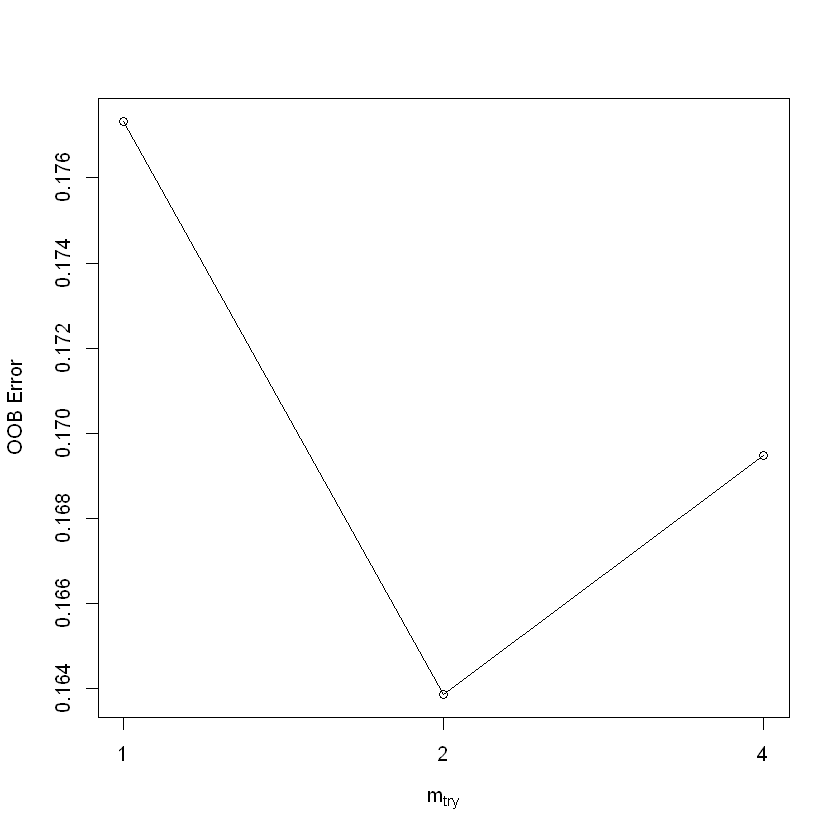

In [11]:
tune_rf <- tuneRF(extractFeatures(titanic), as.factor(titanic$Survived), doBest=TRUE, improve = 1e-5, ntreeTry = 3000,
                  stepFactor = 2)

In [12]:
conf_mat_tune <- tune_rf$confusion
conf_mat_tune

,0,1,class.error
0,509,40,0.07285974
1,105,237,0.30701754


In [13]:
cat("Tune Model accuracy: ", sum(diag(conf_mat_tune))/sum(conf_mat_tune))

Tune Model accuracy:  0.8369047

In [14]:
test <- read.csv("src/titanic/test.csv")

In [15]:
head(test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [17]:
levels(test$Embarked) <- c(levels(test$Embarked),"")

In [18]:
pred <- predict(tune_rf, extractFeatures(test))

In [19]:
survived <- read.csv("src/titanic/gender_submission.csv")

In [20]:
head(survived)

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


In [21]:
conf_mat_test <- table(survived$Survived, pred)

In [22]:
conf_mat_test

   pred
      0   1
  0 254  12
  1  36 116

In [23]:
cat("Test accuracy: ", sum(diag(conf_mat_test))/sum(conf_mat_test))

Test accuracy:  0.8851675